## Setup

In [5]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
# To ignore any warning that pop ups
import warnings
warnings.filterwarnings('ignore')
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


In [6]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [7]:
mnist.DESCR

'mldata.org dataset: mnist-original'

In [8]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
28*28

784

Saving figure some_digit_plot


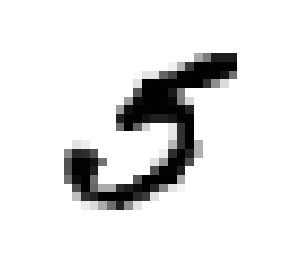

In [11]:
# ploting an content of the dataset specifiaclly number 5
%matplotlib inline
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, 
          interpolation = 'nearest')
plt.axis('off')
save_fig('some_digit_plot')
plt.show()

In [12]:
# creating a function that plots the digits

def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
              interpolation = 'nearest')
    plt.axis('off')

def plot_digits(instances, images_per_row = 10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


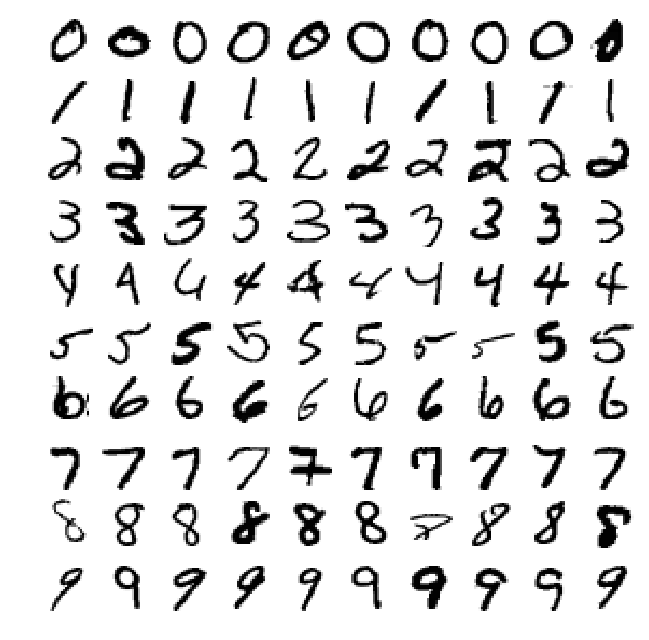

In [13]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [14]:
y[36000]

5.0

In [15]:
y[30000]

4.0

In [16]:
### splitting the data into training and testing
# Note: the first 60000 observations are for training and later 10000 are for testing

X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]


In [19]:
# shuffling the training data
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


## Binary Classifier

In [20]:
# Considering only digit "5" or "not 5"
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [21]:
# Using the Stochastic Gradient Decent for the classification
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

# Note: it is important to shuffle the dataset because SGDClassifier depends on the
# randomness in the dataset, hence the word Stochastic

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [22]:
sgd_clf.predict([some_digit])

array([ True])

In [23]:
# evaluating the model accuracy using cross validation

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train, y_train_5, cv=3, scoring ='accuracy')

array([0.9539, 0.9607, 0.9665])

In [25]:
# Manual representation of k-fold cross_validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))


0.9539
0.9607
0.9665


In [29]:
# Creating a binary-base classifier

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y= None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv= 3, scoring = 'accuracy')


array([0.91145, 0.9073 , 0.9102 ])

In [31]:
# Getting the y_prediction score to pass to the confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5)


## Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53814,   765],
       [ 1613,  3808]])

In [34]:
# Lets see how a perfect prediction looks like
y_train_perfect_prediction = y_train_5
confusion_matrix(y_train_perfect_prediction, y_train_5)

array([[54579,     0],
       [    0,  5421]])

**Precision = TP/(TP + FP)**= from the total observations predicted as 5, how many actually turned out to be 5

**Recall = TP/(TP + FN)**= from the total observation containing 5, how many were correctly predicted as 5


In [36]:
# calculating the precision
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8327137546468402

In [37]:
# manually calculating the precision
3808/(3808+765)

0.8327137546468402

In [38]:
# calculating the recall
recall_score(y_train_5, y_train_pred)

0.7024534218778823

In [39]:
# manually calculating the recall
3808/(3808+1613)

0.7024534218778823

## F1_score
**F1_Score** is the *harmonic mean* of the precision and the recall. The harmonic mean gives much more weight to the low values.

* F1_Score =  2/(1/precision)+(1/recall)  
*          =  2*(precision * recall)/precison+recall 
*          =  TP/(TP + (FN+FP)/2)

In [40]:
# calculating the f1_scores
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7620572343406045

In [41]:
# Manually calculating the f1_score
3808 / (3808 + (1613 + 765)/2)

0.7620572343406044

## Precison/Recall Tradeoff

In [42]:
# We can use the decision_function in the sgd_clf to understand at what threshold
# values did the model classify the observations

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([54676.64475787])

In [45]:
threshold = 0
y_some_digit_pred = ( y_scores > threshold)

In [46]:
y_some_digit_pred

array([ True])

In [47]:
# Increasing the threshold value to 200000
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred


array([False])

In [48]:
# to get the threshold values based on which the predictions were made
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv= 3,
                            method = 'decision_function')
y_scores.shape

(60000,)

In [49]:
y_scores[36000]

-384585.2892264602

In [50]:
from sklearn.metrics import precision_recall_curve
precisions, recalls , thresholds = precision_recall_curve(y_train_5, y_scores)


Saving figure precision_recall_vs_threshold_plot


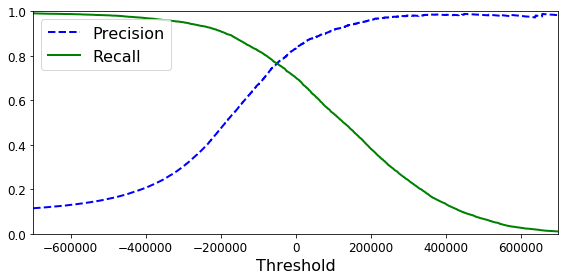

In [51]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [52]:
(y_train_pred == (y_scores > 0)).all()

True

In [55]:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_5,y_train_pred_90)

0.897054698457223

In [56]:
recall_score(y_train_5, y_train_pred_90)

0.5899280575539568

Saving figure precision_vs_recall_plot


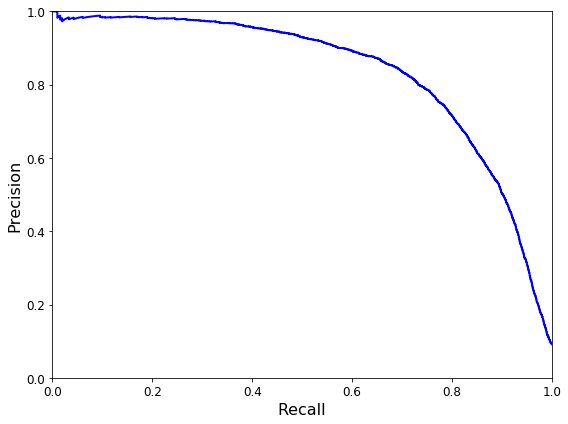

In [57]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

## ROC curves

In [58]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


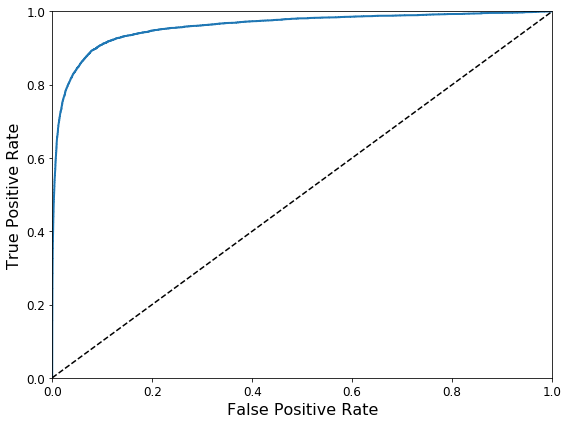

In [59]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9591905924668109

In [62]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv= 3, method = 'predict_proba')


In [63]:
y_scores_forest = y_probas_forest[:,1] # score = proba of positive class

fpr_forest, tpr_forest, thrsholds_forest = roc_curve(y_train_5, y_scores_forest)


Saving figure roc_curve_comparison_plot


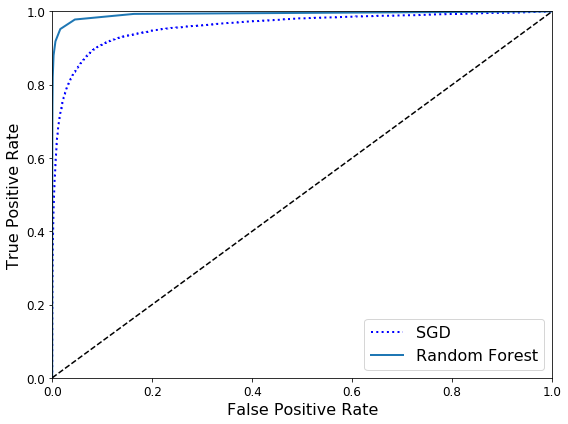

In [64]:
# Comparing the roc curves for RandomForest and SGD
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [65]:
# AUC for randomforest
roc_auc_score(y_train_5, y_scores_forest)

0.9928238543920835

In [68]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9871225577264654

In [69]:
recall_score(y_train_5, y_train_pred_forest)

0.8201438848920863

## Multiclass classification

In [71]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

# The model misclassified 5 as 3

array([3.])

In [74]:
some_digit_score = sgd_clf.decision_function([some_digit])
some_digit_score

array([[ -98428.83909084, -451177.49560179, -282581.5694942 ,
          64637.43232224, -339977.18460688,   54676.64475787,
        -688670.08808897, -326633.31742674, -749605.08382973,
        -670419.01215166]])

In [76]:
np.argmax(some_digit_score)


3

In [77]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [80]:
sgd_clf.classes_[3]

3.0

In [81]:
# Understanding OneVsOneClassifier 
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5,random_state = 42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])


array([5.])

In [83]:
# lets see the total models number of binary classifiers that we run
len(ovo_clf.estimators_)

# We can see that the model was ran N*(N-1)/2 number of times

45

In [84]:
# Running random forest model on the entire train set as a multi-class classification
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [85]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0.1, 0. , 0. , 0.9, 0. , 0. , 0. , 0. ]])

In [86]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")


array([0.86382723, 0.8700935 , 0.86708006])

In [88]:
# To increase the model accuracy we can try scaling the feature variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring = 'accuracy')


array([0.90781844, 0.91104555, 0.91053658])

In [89]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx


array([[5739,    2,   27,   13,   11,   43,   43,    5,   38,    2],
       [   1, 6494,   41,   27,    6,   41,    8,   15,   98,   11],
       [  56,   42, 5316,  102,   87,   24,  103,   55,  159,   14],
       [  53,   37,  132, 5333,    2,  248,   36,   57,  134,   99],
       [  20,   24,   39,    6, 5381,    9,   55,   31,   78,  199],
       [  72,   46,   30,  186,   72, 4589,  120,   30,  177,   99],
       [  35,   24,   43,    2,   41,   91, 5633,    5,   43,    1],
       [  22,   23,   69,   34,   55,   11,    6, 5815,   15,  215],
       [  47,  162,   72,  153,   14,  166,   54,   24, 5013,  146],
       [  46,   27,   27,   84,  171,   39,    3,  205,   72, 5275]])

In [90]:
# plotting a density-graph 
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


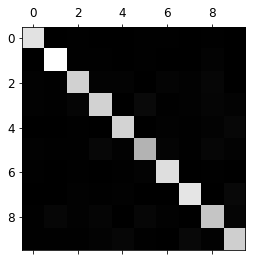

In [91]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Saving figure confusion_matrix_errors_plot


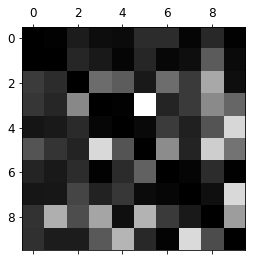

In [92]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Saving figure error_analysis_digits_plot


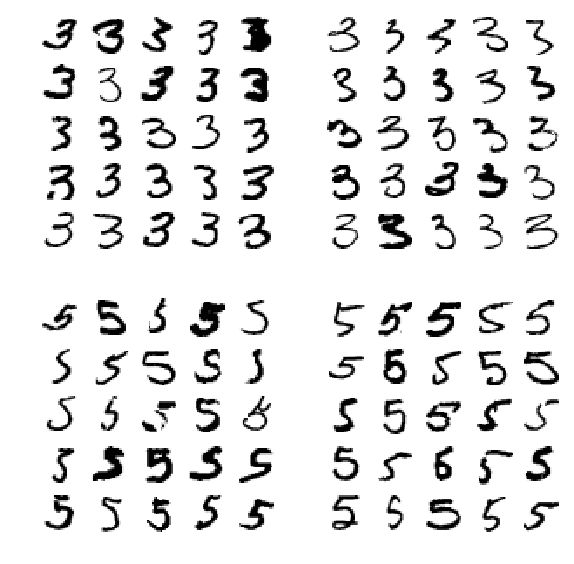

In [93]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()


## Multilabel classification

In [95]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [96]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [97]:
# y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
# f1_score(y_multilabel, y_train_knn_pred, average="macro")

## Multioutput classification

In [98]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving figure noisy_digit_example_plot


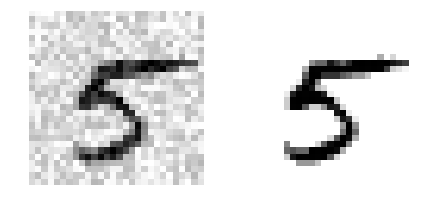

In [99]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Saving figure cleaned_digit_example_plot


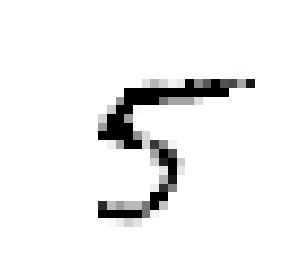

In [100]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

## Exercise solutions

## 1. An MNIST Classifier With Over 97% Accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=distance .................................
[CV] n_neighbors=3, weights=distance .................................
[CV] n_neighbors=3, weights=distance .................................
[CV] n_neighbors=4, weights=uniform ..................................
[CV] n_neighbors=4, weights=uniform ..................................


In [ ]:
grid_search.best_params_